In [2]:
#import necessary libraries 
import pandas as pd
import sklearn as sns 
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
#set display option
pd.set_option('display.max_columns', None)

In [4]:
#load datset
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [5]:
#print first 5 rows of dataset
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_s

In [6]:
#print basic information of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#find null values in the data columns
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
#drop the unnnecessary column
df.drop('Unnamed: 32', inplace=True, axis=1)

In [9]:
#print statistical information of the data
print(df.describe)

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [10]:
#print statistical information of single column
print(df['compactness_worst'].describe())

count    569.000000
mean       0.254265
std        0.157336
min        0.027290
25%        0.147200
50%        0.211900
75%        0.339100
max        1.058000
Name: compactness_worst, dtype: float64


In [11]:
print(df['area_se'].describe())

count    569.000000
mean      40.337079
std       45.491006
min        6.802000
25%       17.850000
50%       24.530000
75%       45.190000
max      542.200000
Name: area_se, dtype: float64


By using the describe function, we can see that the data we have is deviated to extremes currently, the mean for the colum area_se is 40.33 but it's min is 6.80 and max is extremely deviated being 542.2000. 

For this kind of data we'll use PCA to compress the data while preserving it's important information. This will thus help the train the model in reduced time while avoiding overfitting. 

In [12]:
# Map target variable 'diagnosis' to numerical values
df['diagnosis'] = df.diagnosis.apply(lambda x:0 if x=='M' else 1)

The values M and B are changed to 0 and 1 to access the further analysis. Lambda function is thus used for the same, other methods that can be used for the purpose includes usage of labelEncoder(), getdummies, or enumerate function in for loop. 

In [13]:
# Separate features and target variable
features = df.drop(columns=['id', 'diagnosis'])
target = df['diagnosis']

The data is now divided into features and the target variable. The features include all the columns other than the target column and id as id is not required in the further analysis. The target column diagnosis determines whether the individual contains M = malignant, B = benign tumors. 

In [14]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features) #numpy array

In [16]:
# Apply PCA to reduce dimensions
from sklearn.decomposition import PCA

In [17]:
principal = PCA(n_components = 2)
principal.fit(scaled_features)
X = principal.transform(scaled_features)

In [18]:
print(X)

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


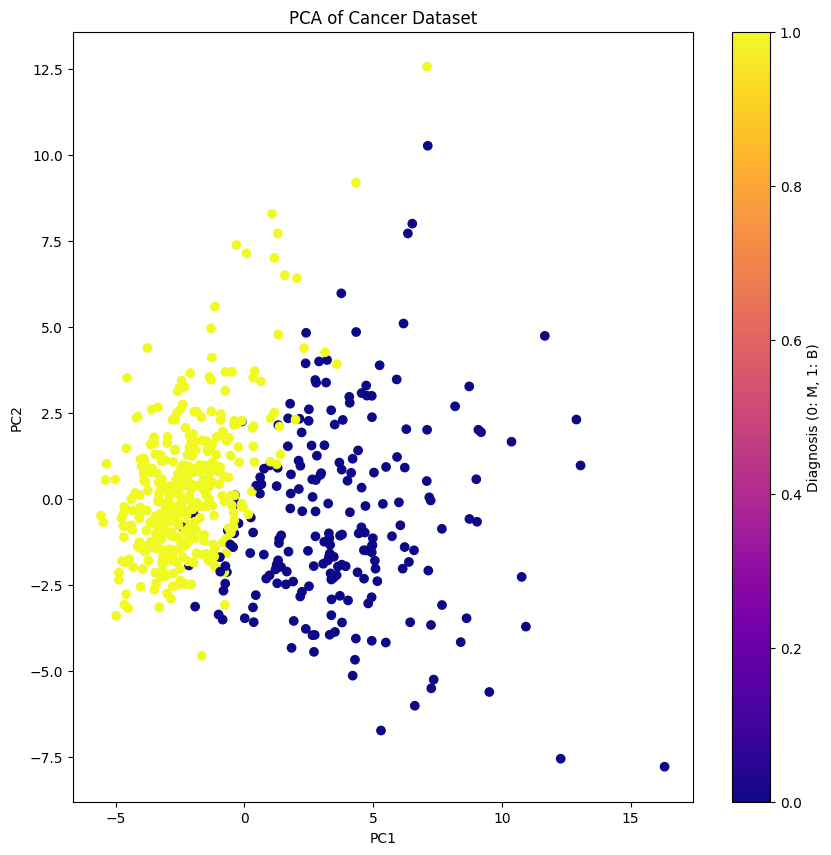

In [20]:
#Plotting PCA result
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=df['diagnosis'], cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Cancer Dataset')
plt.colorbar(label='Diagnosis (0: M, 1: B)')
plt.show()